# ANÁLISE DE RISCO CARTÃO DE CRÉDITO

Obtendo os dados do nosso projeto

In [4]:
url = 'https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv'

import pandas as pd

df = pd.read_csv(url)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Limpando os dados

In [5]:
df.drop(columns = ['CUST_ID', 'TENURE'], inplace=True)
df.head()        

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


Missing data

In [6]:
missing = df.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [7]:
df.fillna(df.median(), inplace=True)
missing = df.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

Normalizar

In [8]:
from sklearn.preprocessing import Normalizer

norm_df = Normalizer().fit_transform(df)

colunas = df.columns
df = pd.DataFrame(norm_df, columns = colunas)

df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.245525,0.000246,0.152657,0.078253,0.074494,0.138819,0.000132,0.000039,0.000102,0.000030,0.000625,0.002816,0.743808,0.257959,0.132307,0.000044
std,0.218888,0.000216,0.164944,0.125214,0.109866,0.203105,0.000170,0.000068,0.000161,0.000057,0.001257,0.003658,0.202171,0.198470,0.154247,0.000113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005261,0.000000,0.000009,0.000000
25%,0.033441,0.000100,0.008518,0.000000,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000153,0.624735,0.109536,0.040319,0.000000
50%,0.202915,0.000176,0.095271,0.006962,0.017960,0.000000,0.000077,0.000008,0.000031,0.000000,0.000000,0.001581,0.752792,0.192977,0.086190,0.000000
75%,0.430584,0.000330,0.249526,0.112331,0.113628,0.243806,0.000177,0.000054,0.000134,0.000041,0.000771,0.004118,0.927302,0.372949,0.159889,0.000030
max,0.762193,0.002917,0.705478,0.637729,0.584347,0.812682,0.001375,0.000860,0.001146,0.000912,0.022500,0.063149,1.000000,0.977965,0.994341,0.002063


K-means

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)

y_pred = kmeans.fit_predict(df)

**Métricas de Validação:**

- Externas: precisam de labels

- Internas: não precisam de labels

**Critérios de Validação:**

- Compactação
- Separação

## Matemática de Silhoette

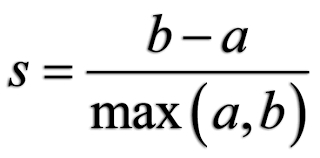

 a = distância média euclidiana entre o ponto e todos os outros pontos do mesmo cluster
 
 b = distância média euclidiana entre o ponto e todos os outros pontos do cluster mais próximo

 max(a, b) = maior valor entre a e b

 **s sempre varia ente [-1, 1]**

## Implementando o Silhouette

In [10]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(df, labels, metric = 'euclidean')
silhouette

0.3644845919974304

## Matemática Davies-Bouldin

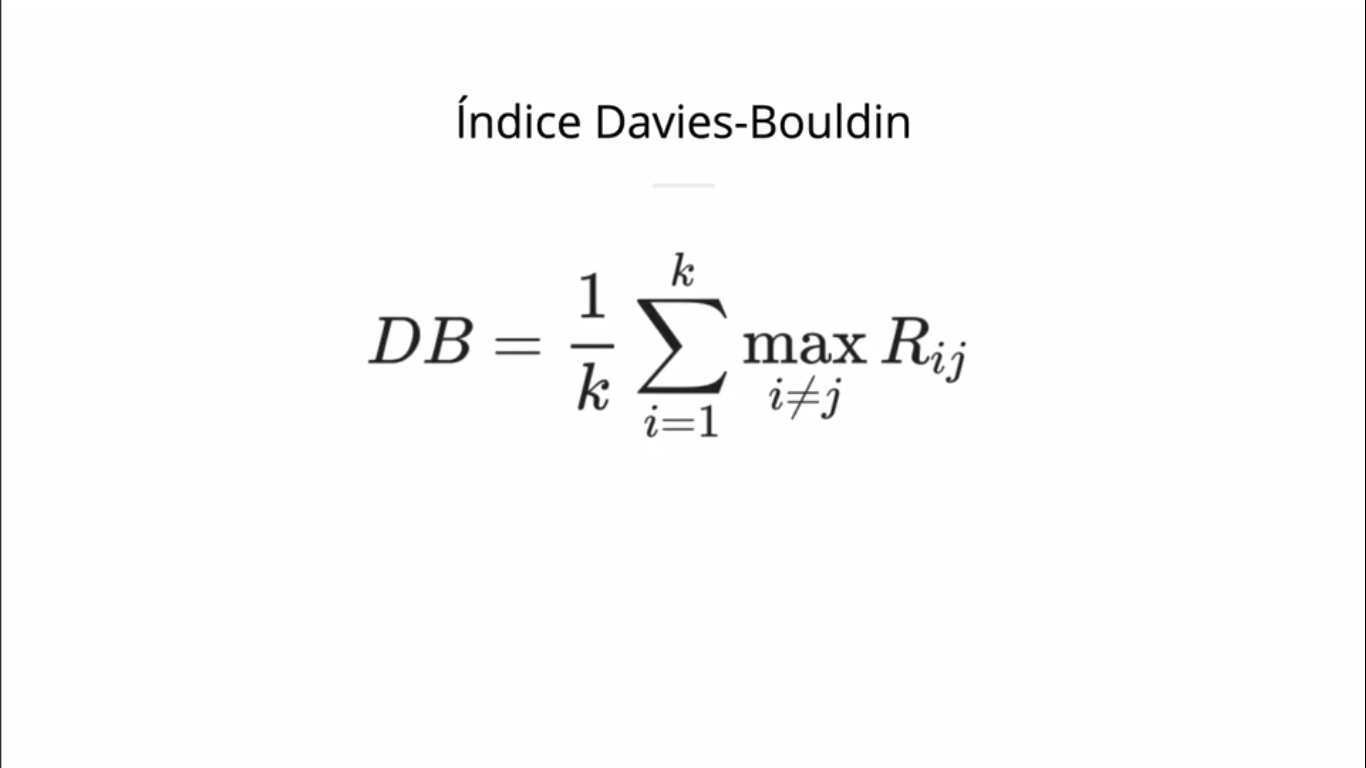

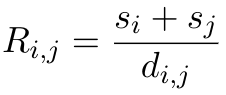

s = distância média entre cada ponto do cluster e seu centroide (média dos pontos do mesmo cluster)

d = distância entre os centroides dos clusters

## Implementando Davies-Bouldin

In [11]:
dbs = metrics.davies_bouldin_score(df, labels)
dbs

1.0757138590613295

# Matemática do Calinski

A seguir a fórmula completa:

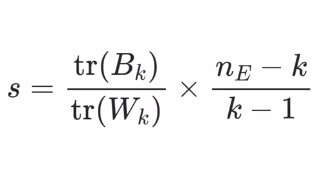

Legenda:

ne = número de elementos

k = número de clusters

bk = dispersão dos elementos entre (between) clusters

wk = dispersão dos elementos dentro (within) do cluster



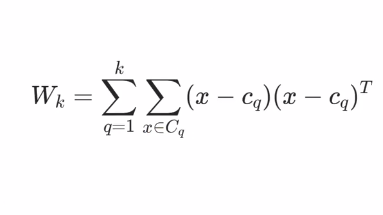

Legenda:

k = número de clusters

q = cluster

**Passo-a-passo para calcular o Wk**

Parte 1: estimação da Matriz Variância-Covariância

1. Obter uma matriz com os valores de x e y
2. Obter um vetor com os centróides
3. Obter uma matriz com as diferenças em relação aos centróides
4. Criar uma matriz transposta
5. Multiplicação das matrizes

Parte 2: somatório das matrizes

Parte 3: cálculo do tr(Wk), soma da diagonal


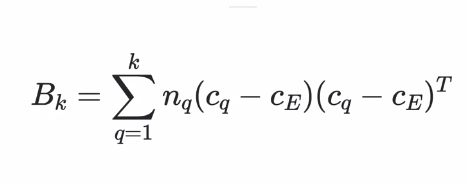

Legenda:

nq = número de elementos no cluster

cq = centroide do cluster

ce = centroide dos elementos

## Implementando Calinski

In [13]:
calinski = metrics.calinski_harabasz_score(df, labels)
calinski

3431.7937428414293

## Interpretando os índices com a validação relativa

In [20]:
#Mudando o número de clusters

def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters = n_clusters, n_init = 10, max_iter = 300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric='euclidean')
  db = metrics.davies_bouldin_score(dataset, labels)
  ch = metrics.calinski_harabasz_score(dataset, labels)
  return s, db, ch

In [21]:
s1, db1, ch1 = clustering_algorithm(3, df)
print(s1, db1, ch1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [22]:
s2, db2, ch2 = clustering_algorithm(5, df)
print(s2, db2, ch2)

0.36454314826693845 1.075812734747931 3431.8005407346513


In [25]:
s3, db3, ch3 = clustering_algorithm(50, df)
print(s3, db3, ch3)

0.24433068446932274 1.2101299007841644 1617.2973425668888


## Validando com amostra de dados

In [29]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, db, ch = clustering_algorithm(5, random_data)
print(s, db, ch)
print(s2, db2, ch2)

0.03975970806527084 3.490884989244512 301.832894573014
0.36454314826693845 1.075812734747931 3431.8005407346513


## Estabilidade dos clusters

In [33]:
set1, set2, set3 = np.array_split(df, 3)
s, db, ch = clustering_algorithm(5, set1)
s2, db2, ch2 = clustering_algorithm(5, set2)
s3, db3, ch3 = clustering_algorithm(5, set3)
print(s, db, ch)
print(s2, db2, ch2)
print(s3, db3, ch3)

0.36924842589129836 1.0531977672086477 1204.034367351662
0.3538037064965953 1.1394936582652304 1194.948634553892
0.3668564117315988 1.0993525253456347 1167.5313082261505


## Interpretando pelos gráficos

<function matplotlib.pyplot.show>

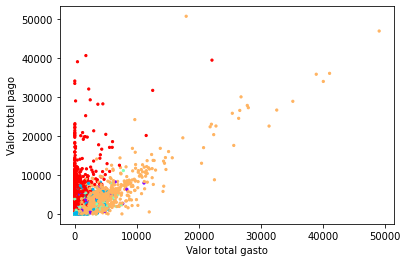

In [42]:
import matplotlib.pyplot as plt

df = pd.read_csv(url)

plt.scatter(df['PURCHASES'], df['PAYMENTS'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Valor total gasto')
plt.ylabel('Valor total pago')
plt.show

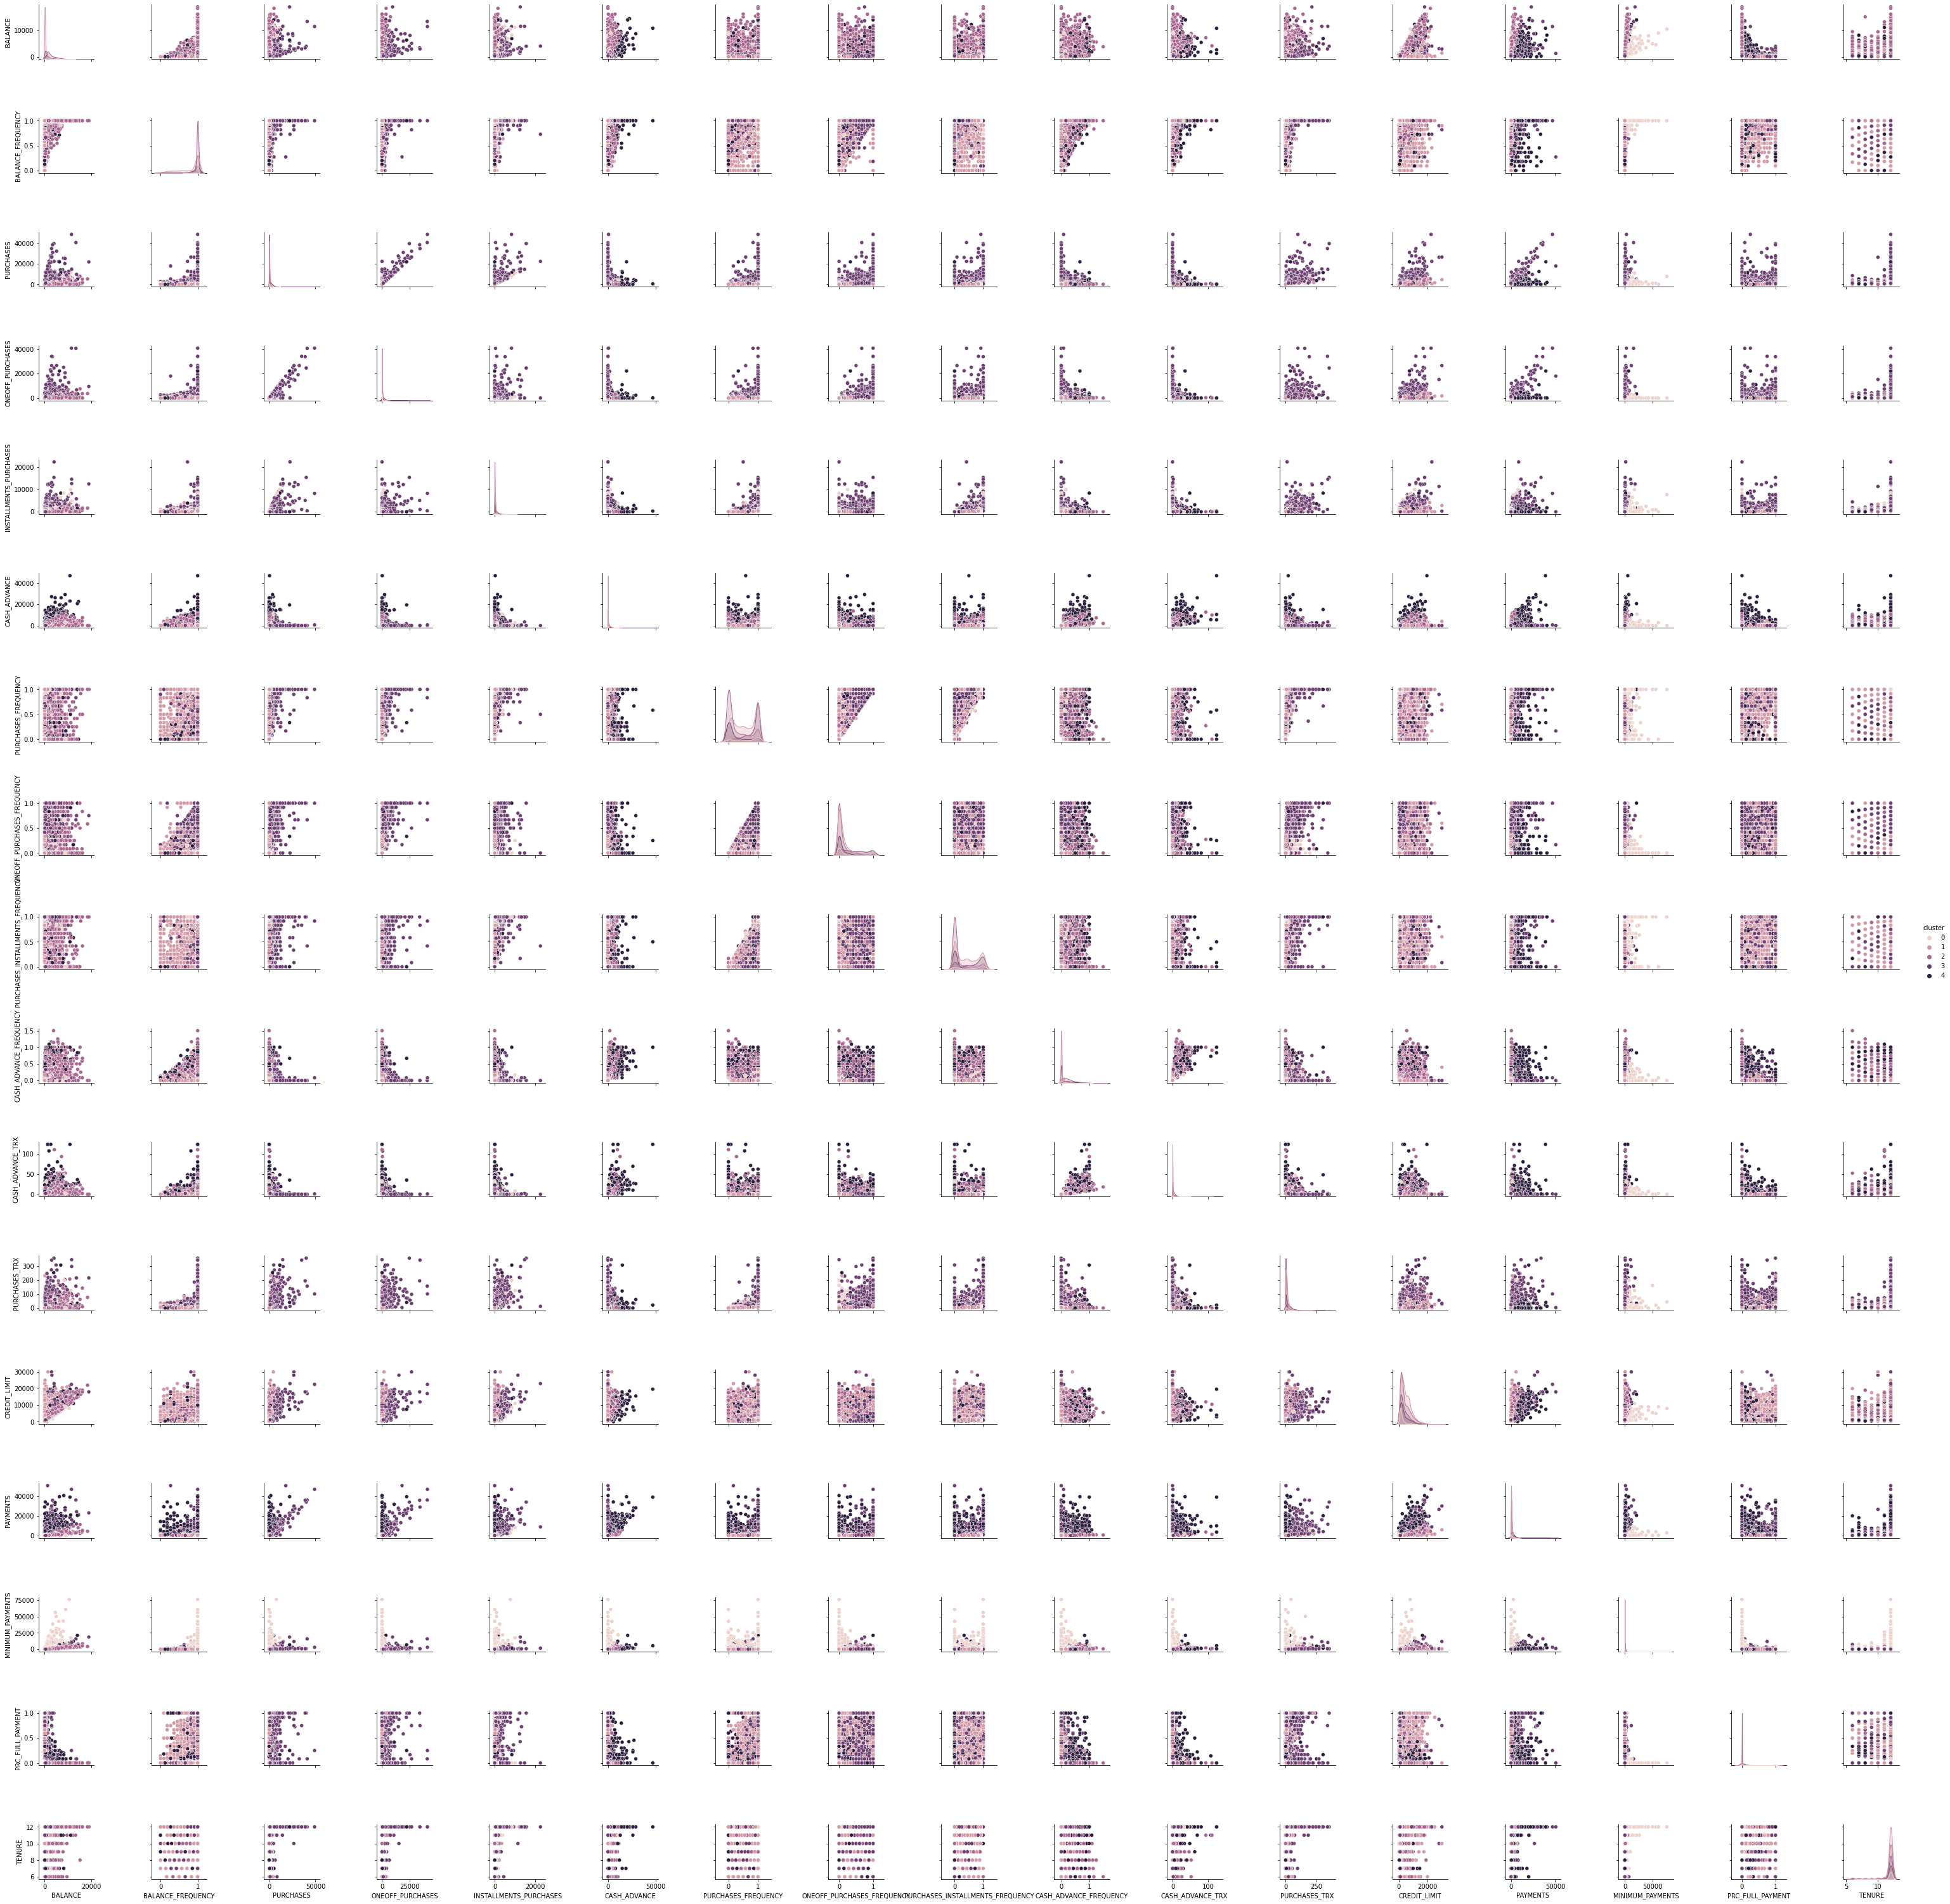

In [43]:
import seaborn as sns

df = pd.read_csv(url)
df['cluster'] = labels

sns.pairplot(df[0:], hue = 'cluster')

## Descrevendo os atributos

In [44]:
df.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0         411.0  1987.501586  1854.459156  70.794108  1018.958891   
1        3278.0   443.992358   846.597972   0.000000    23.315538   
2        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
3        1540.0  1142.222657  1664.035755   0.000000   211.566656   
4        1072.0  1794.024195  1982.950586   0.000000   506.925348   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1337.287314  2138.678431  11670.179850             411.0  0.989486   
1          82.992153   411.193793   9630.367575            3278.0  0.774417   
2        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
3         554.332740  1370.859355  19043.138560            1540.0  0.928053   
4        1087.920500  2308.762488  14581.459140            1072.0  0.862131   

         ... PRC_FULL_PAYMENT       TENURE                                  \
         ...              75%  max   count       mean       std  min   25%   
cluster  ...                                                                 
0        ...         0.000000  1.0   411.0  11.790754  0.829347  7.0  12.0   
1        ...         0.444444  1.0  3278.0  11.537828  1.329785  6.0  12.0   
2        ...         0.000000  0.6  2649.0  11.403171  1.481687  6.0  12.0   
3        ...         0.545455  1.0  1540.0  11.595455  1.221682  6.0  12.0   
4        ...         0.142857  1.0  1072.0  11.519590  1.283956  6.0  12.0   

                           
          50%   75%   max  
cluster                    
0        12.0  12.0  12.0  
1        12.0  12.0  12.0  
2        12.0  12.0  12.0  
3        12.0  12.0  12.0  
4        12.0  12.0  12.0  

[5 rows x 136 columns]